In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("wnba.csv")
data.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,3,9,12,12,7,0,14,50,0,0


In [4]:
data["Experience"].dtype

dtype('O')

In [5]:
data["Experience"].value_counts()

R     23
3     19
6     14
5     14
1     12
9     11
4     11
2     11
10     5
12     4
7      4
11     4
14     3
8      3
13     3
15     2
Name: Experience, dtype: int64

In [6]:
data["Experience"].value_counts(dropna = False)

R     23
3     19
6     14
5     14
1     12
9     11
4     11
2     11
10     5
12     4
7      4
11     4
14     3
8      3
13     3
15     2
Name: Experience, dtype: int64

In [7]:
def category(x):
    if pd.isnull(x):
        return "Rookie"
    elif 0 < x <= 3:
        return "little experience"
    elif 3 < x <= 5:
        return "experienced"
    elif 5 < x <=10:
        return "very experience"
    else:
        return "vetern"

In [8]:
pd.to_numeric(data["Experience"],errors ="coerce")

0       2.0
1      12.0
2       4.0
3       6.0
4       NaN
       ... 
138     6.0
139     9.0
140     2.0
141     8.0
142     2.0
Name: Experience, Length: 143, dtype: float64

In [9]:
data["Experience_ordinal"] = pd.to_numeric(data["Experience"],errors = "coerce").apply(category)

In [10]:
data["Experience_ordinal"].value_counts()

little experience    42
very experience      37
experienced          25
Rookie               23
vetern               16
Name: Experience_ordinal, dtype: int64

In [11]:
values = data["Experience_ordinal"].value_counts().iloc[[3,0,2,1,4]]

In [12]:
values

Rookie               23
little experience    42
experienced          25
very experience      37
vetern               16
Name: Experience_ordinal, dtype: int64

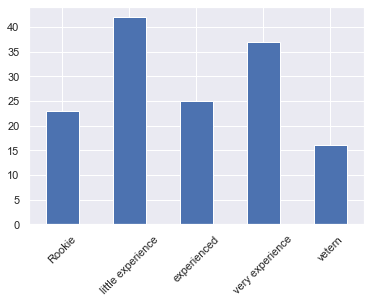

In [13]:
values.plot(kind = "bar", rot = 45)
plt.show()

In [14]:
values.value_counts(normalize=True)*100

16    20.0
25    20.0
42    20.0
37    20.0
23    20.0
Name: Experience_ordinal, dtype: float64

In [15]:
values1 = round((data["Experience_ordinal"].value_counts(normalize=True)*100),2).iloc[[3,0,2,1,4]]

In [16]:
values1

Rookie               16.08
little experience    29.37
experienced          17.48
very experience      25.87
vetern               11.19
Name: Experience_ordinal, dtype: float64

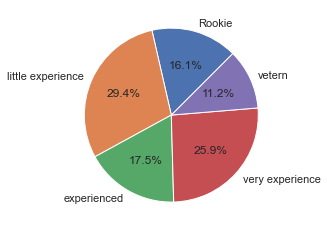

In [17]:
values1.plot(kind = "pie",autopct = "%.1f%%",startangle = 45)
plt.ylabel("")
plt.show()

In [18]:
data["PTS"].value_counts(bins=10)

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(118.4, 176.6]    17
(234.8, 293.0]    17
(351.2, 409.4]    10
(293.0, 351.2]     8
(409.4, 467.6]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64

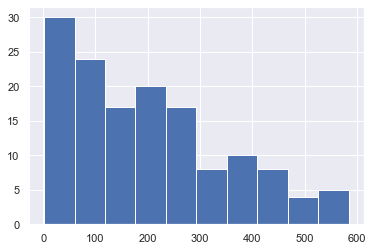

In [19]:
data["PTS"].hist()
plt.show()

In [23]:
values1.index

Index(['Rookie', 'little experience', 'experienced', 'very experience',
       'vetern'],
      dtype='object')

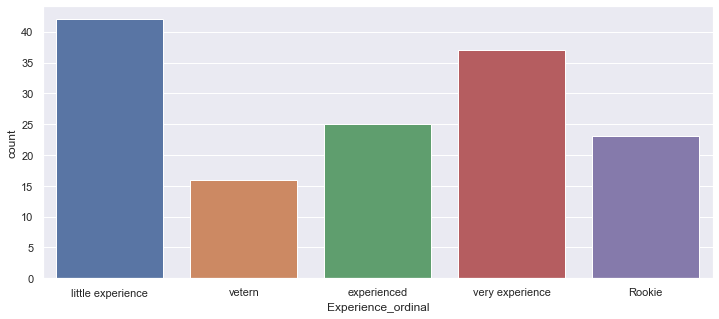

In [29]:
fig = plt.figure(figsize=(12,5))
sns.countplot(data=data, x = "Experience_ordinal")
plt.show()